    - Dans ce qui suit, nous allons traiter plusieurs notions d'apprentissage automatique non supervisée en commencant par decrire notre base de données à l'aide des fonctions de pandas et numpy. puis, nous passerons à l'PCA (Principal Componant Analysis) qui va à son tour nous permettre d'extraire les portions d'informations portées par les attributs (colonnes) de notre dataset. Ensuit, nous traiterons notre dataset par une application des 3 algorithmes de segemntation (Clustring Algorithms) [Kmeans , DBSCAN et Hierarchical clustring CHA] présentés par le module SKLEARN. A la fin, nous finirons par une conclusion globale sur le total de notre travail. 
# 
# 
# 
# 
# 
# 
# 


#    1: Description de données

# 
# 
- importation des libraibies nécessaires pour le traitement 

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


# 
# 
- Lecture de dataset par le module pandas

In [2]:
df = pd.read_csv("C:\\Users\\-\\Desktop\\WineQT.csv")

# remplacer ce chemin par le chemin ou vous avez positionné le dataset

# 
# 
- Affichage des 10 premieres lignes


In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


# 
# 
- Affichage des 10 dernieres lignes



In [4]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1133,6.7,0.320,0.44,2.4,0.061,24.0,34.0,0.99484,3.29,0.80,11.6,7,1584
1134,7.5,0.310,0.41,2.4,0.065,34.0,60.0,0.99492,3.34,0.85,11.4,6,1586
1135,5.8,0.610,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6,1587
1136,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6,1590
1137,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6,1591
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


# 
# 
- Affichage de l'ensemble des colonnes de notre dataset



In [5]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### 
# 
- Elimination des colonnes  'Id' et 'quality' pour  rendre l'apprentissage non supervisé

In [7]:
df=df.drop(columns=['quality','Id'])
df = df.dropna()

# 
# 
- par la fonction describe() on peut savoir plus sur les statistiques descriptives de notre dataset [ min , max , la moyenne , l'ecart type ...]



In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# 
- Tracage de la boite à moustache pour visualiser les points abérants

<AxesSubplot:>

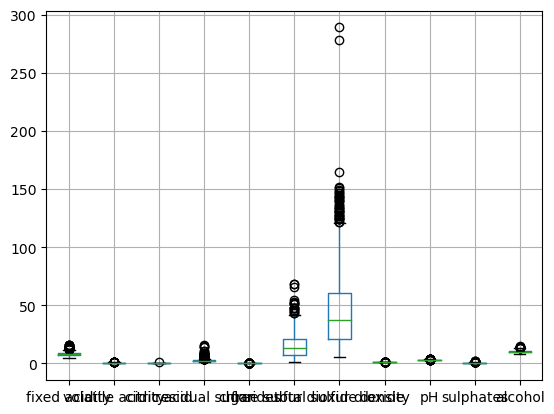

In [9]:
df.boxplot()


# 
# 
- Boite à moustache pour chaque colonne séparée



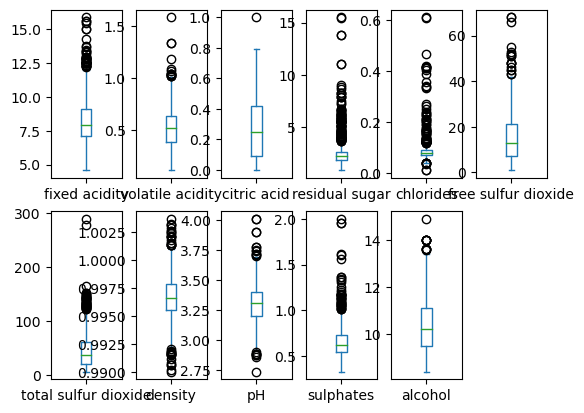

In [10]:
df.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False)
plt.show()

# 
# 
- plot correlation matrix

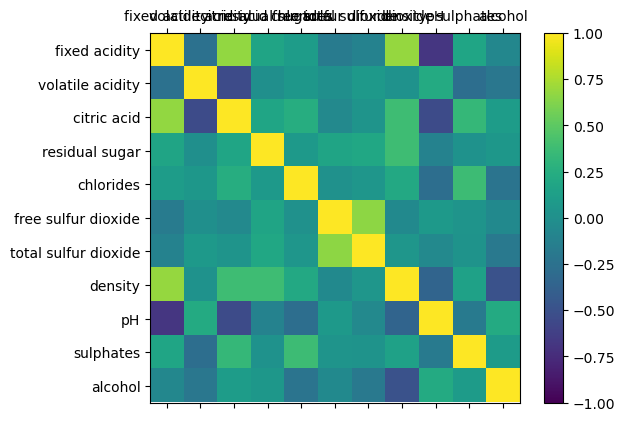

In [11]:
c = df.corr(method="pearson")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

# 
# 
# 

# 2: Analyse par composant principal (PCA)

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


# 
- vérification s'il y a des valeurs nulles 

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

# 
### Pour accélerer les calculs (Complexité temporelle) on va utiliser numpy

In [14]:
dfnum = df.values

dfnum

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [15]:
dfnum.shape


(1143, 11)

- il faut absolument unifier l'échelle de toutes les variables
- On parle donc d'une remise à l'échelle (rescaling)
- soit X une variable aléatoire et Z une variable aléatoire centrée reduite:
$$ Z = \frac{x - \mu }{ \sigma } $$

In [16]:
# dfss = (df - df.mean()) / df.std()

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dfss = ss.fit_transform(dfnum)   # valeur moyenne divisée par l'écart-type


In [17]:
dfss

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

# 
# 
- calcul de la matrice de covariance

In [18]:
matrice_covariance = np.cov(dfss.T)  
from numpy.linalg import eig
matrice_covariance.shape

(11, 11)

In [19]:
(valeurs_propres , vercteurs_propres) = eig(matrice_covariance)

# 
# 
* les valeurs propres

In [20]:
valeurs_propres.shape

(11,)

# 
- les vecteurs propre

In [21]:
vercteurs_propres.shape

(11, 11)

# 
### [ Maintenant on va trier les valeurs des valeurs_propres et calculer le pourcentage ]

In [22]:
pourcentage_infos = (valeurs_propres / valeurs_propres.sum()) * 100

pourcentage_infos

array([28.69234485, 17.07510362, 14.30592809, 11.01367977,  8.71103228,
        0.53144984,  1.61119495,  6.04881072,  5.06906721,  3.13176334,
        3.80962533])

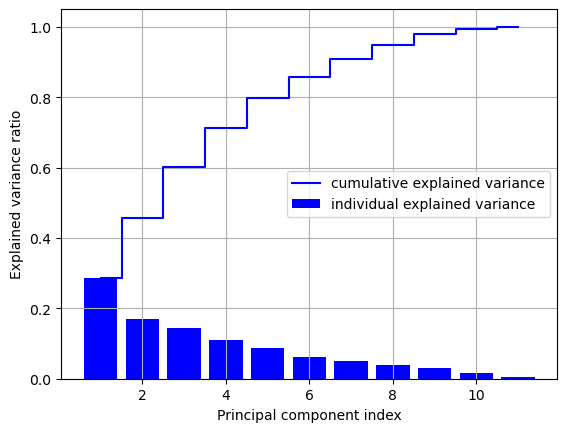

In [23]:
total = sum(valeurs_propres)
var_exp = [(i / total) for i in sorted(valeurs_propres , reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,12), var_exp, alpha = 1, color='blue', align ='center', label='individual explained variance')
plt.step(range(1,12),cum_var_exp, color='blue', where = 'mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.grid()
plt.show()

# 
# 
- PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA(0.8)    # 80% d'informations à extraire
dfacp = pca.fit_transform(dfss)

# 
# 
- la deuxieme colonne de dfacp.shape indique le nombre de colonnes qui portent 80% d'information

In [25]:
dfacp.shape

(1143, 6)

In [26]:
# 6 colonnes de notre dataset portent 80% d'informations 

# 
# 3: L'algorithme Kmeans

# 
- Pour ce qui suit, on va se limiter en 3 colonnes pour rendre le travail plus leger


In [27]:
X = df[['citric acid','free sulfur dioxide','alcohol']]

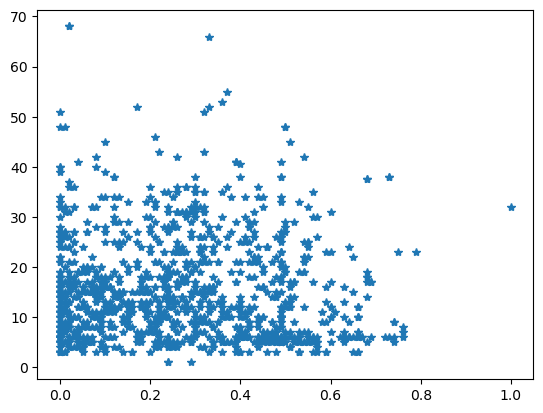

In [28]:
plt.plot(X.values[:,0], X.values[:,1], "*" )

# 
- La mise en echelle des données par StandardScaler


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(X)

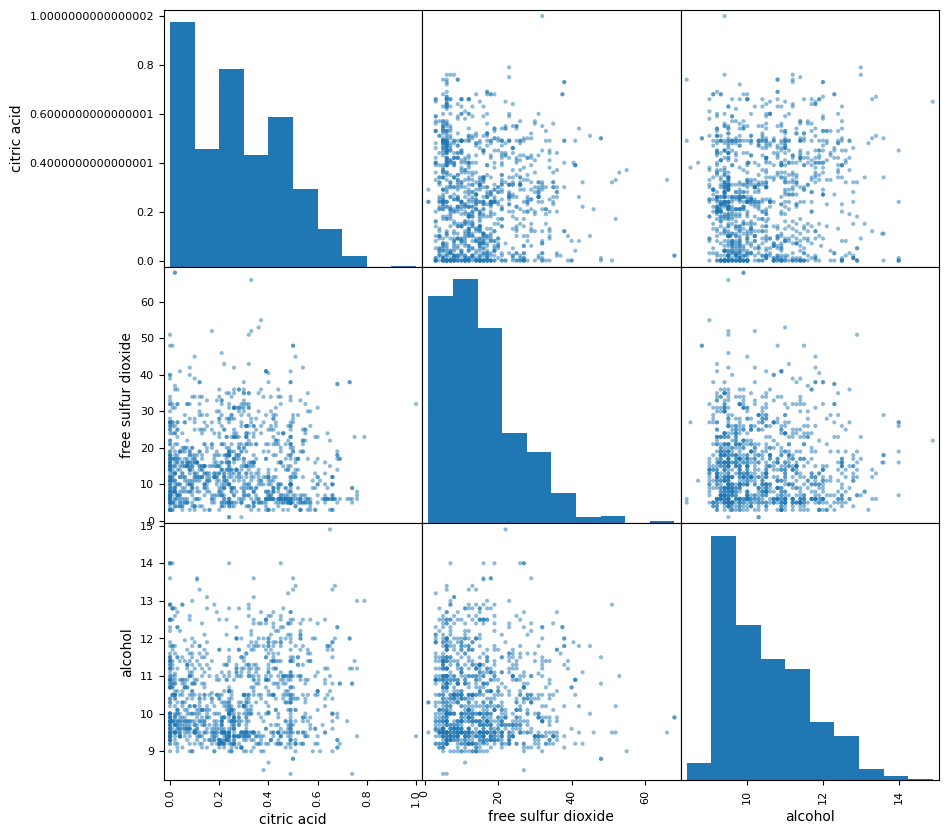

In [30]:
pd.plotting.scatter_matrix(X,figsize=(10,10));

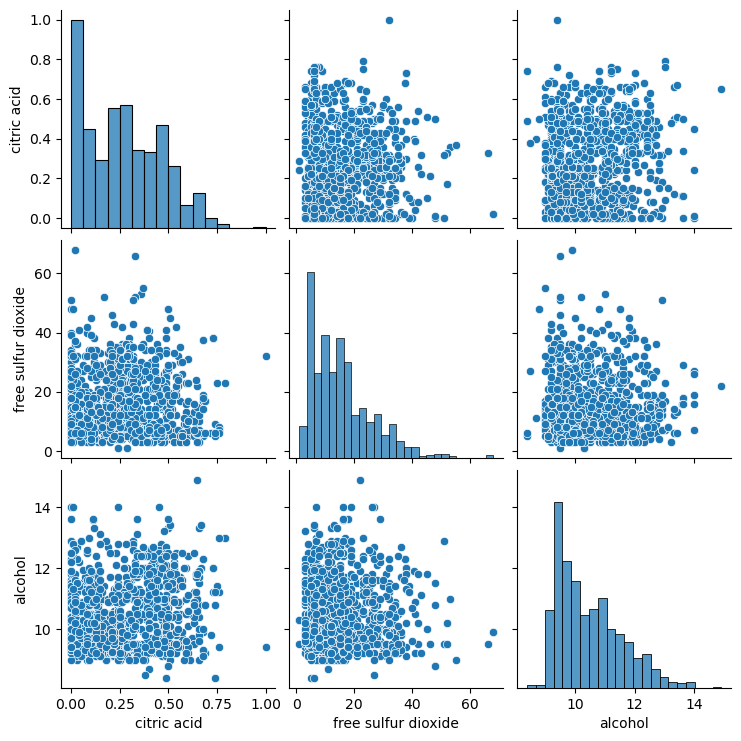

In [31]:
import seaborn as sns
b=sns.pairplot(X, diag_kind="hist" , markers=["o", "s"])

# 
# 
- Autre maniere de Standardiser les données à l'aide de MinMAxScaler de sklearn


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
# Standardisation et initialisation de l'algorithme Kmeans
for i in X.columns:
    MinMaxScaler(i)
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)
df['segments'] = clusters

# 
# 
- elbow method pour déterminer l'hyperparametre K de l'algo Kmeans clustering 


D:\Programs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


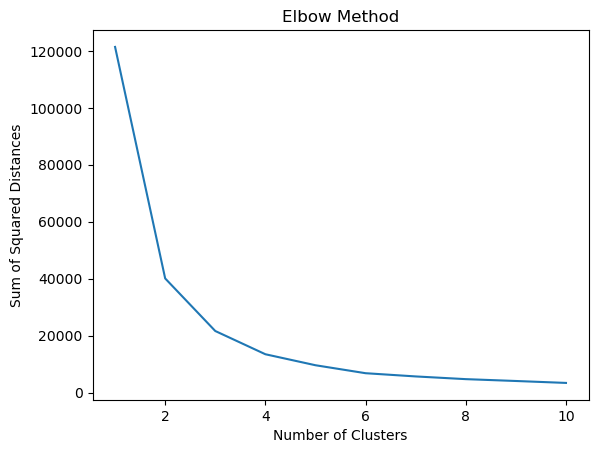

In [34]:
def elbow_method(Xss, max_clusters):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(Xss)
        sse.append(kmeans.inertia_)
        
    plt.plot(range(1, max_clusters+1), sse)
    plt.title("Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Distances")
    plt.show()

elbow_method(X, 10)

# 
# 
- Aucune réduction significative de la somme des carrés de distances passée 6 clusters.

In [35]:
for i in X.columns:
    MinMaxScaler(i)
    
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(X)
X['segments']= clusters

C:\Users\-\AppData\Local\Temp\ipykernel_5368\313148903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['segments']= clusters


# 
# 
- transformation des noms des clusters pour une simple interpretation

In [36]:
X['segments'] = X['segments'].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3",3: "Cluster 4",4: "Cluster 5",5: "Cluster 6"})


C:\Users\-\AppData\Local\Temp\ipykernel_5368\1203619771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['segments'] = X['segments'].map({0: "Cluster 1", 1:


In [37]:
X['segments']

0       Cluster 1
1       Cluster 2
2       Cluster 5
3       Cluster 5
4       Cluster 1
          ...    
1138    Cluster 2
1139    Cluster 2
1140    Cluster 6
1141    Cluster 6
1142    Cluster 6
Name: segments, Length: 1143, dtype: object

# 
# 
- tracage des clusters dans un graphe 3d en utilisant Plotly 


In [39]:
import plotly.graph_objects as go

PLOT = go.Figure()
for i in list(X['segments'].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = X[X['segments']== i]['citric acid'],
                                y =X[X['segments'] == i]['free sulfur dioxide'],
                                z = X[X['segments']== i]['alcohol'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='citric acid: %{x} <br>free sulfur dioxide %{y} <br>alcohol: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'citric acid', titlefont_color = 'black'),
                                yaxis=dict(title = 'free sulfur dioxide', titlefont_color = 'black'),
                                zaxis=dict(title = 'alcohol', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## /!\   Pour bien visualiser les clusters, il faut tourner le graphe en utilisant la souris
# 
# 

# 
# 
- Affichage des données en associant à chaque données sa classe

In [45]:
X

,citric acid,free sulfur dioxide,alcohol,segments
0,0.00,11.0,9.4,Cluster 1
1,0.00,25.0,9.8,Cluster 2
2,0.04,15.0,9.8,Cluster 5
3,0.56,17.0,9.8,Cluster 5
4,0.00,11.0,9.4,Cluster 1
...,...,...,...,...
1138,0.13,29.0,11.0,Cluster 2
1139,0.08,28.0,9.5,Cluster 2
1140,0.08,32.0,10.5,Cluster 6
1141,0.10,39.0,11.2,Cluster 6


- Evaluation de notre modele Kmeans

In [46]:
from sklearn import metrics
metrics.silhouette_score(X.drop(columns=['segments']), kmeans.labels_)


0.501672116317398

# 
# 
# 3: DBSCAN Clustring 

# 
# 
- importation du dataset et mise en echelle de données

In [82]:
X = df[['citric acid','free sulfur dioxide','alcohol']]

In [83]:
for i in X.columns:
    MinMaxScaler(i)

In [84]:
from sklearn.cluster import DBSCAN
min_simples=6
dbscan = DBSCAN(min_samples=min_simples)
clusters = dbscan.fit_predict(X)

In [85]:
clusters

array([ 0,  1,  2, ..., 31, -1, 31], dtype=int64)

# 
# 
- Aplliation  NearestNeighbors avec _neighbors=min_simples pour trouvé la meilleure distance

In [86]:
from sklearn.neighbors import NearestNeighbors


In [87]:
nbrs = NearestNeighbors(n_neighbors=min_simples).fit(X)

In [88]:
distances , indices = nbrs.kneighbors(X)

In [89]:
print("min samples: " + str(min_simples))
print("shape of distances matrix:: " + str(distances.shape)+"\n")
for enum, row in enumerate(distances[:6]):
    print("obsr "+ str(enum) + " : " + str([round(x,2) for x in row]))

min samples: 6
shape of distances matrix:: (1143, 6)

obsr 0 : [0.0, 0.0, 0.0, 0.14, 0.15, 0.19]
obsr 1 : [0.0, 0.17, 0.24, 0.24, 0.26, 0.28]
obsr 2 : [0.0, 0.08, 0.09, 0.13, 0.17, 0.2]
obsr 3 : [0.0, 0.07, 0.23, 0.29, 0.3, 0.3]
obsr 4 : [0.0, 0.0, 0.0, 0.14, 0.15, 0.19]
obsr 5 : [0.0, 0.15, 0.24, 0.24, 0.28, 0.28]


In [90]:
X['dist'] =distances[:,-1]
X['dist']


C:\Users\-\AppData\Local\Temp\ipykernel_5368\1708509332.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       0.188680
1       0.278568
2       0.202237
3       0.300000
4       0.188680
          ...   
1138    0.700071
1139    0.524976
1140    0.700071
1141    1.166362
1142    0.434626
Name: dist, Length: 1143, dtype: float64

# 
# 
- Encore une fois la methode du coude (ELBOW METHOD), mais cette fois ci, pour le DBSCAN et non pas KMEANS

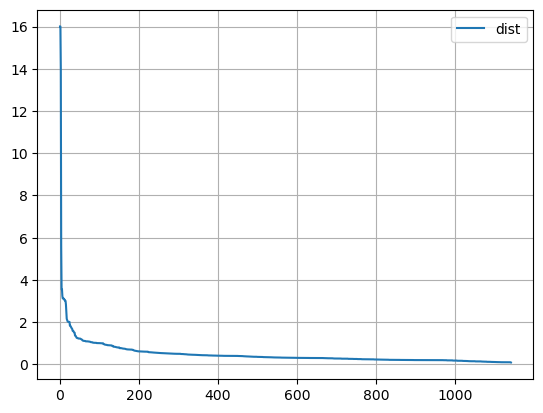

In [91]:
X.sort_values('dist', ascending=False).reset_index()[['dist']].plot();
plt.grid()

# 
# 
- le coude est situé entre 0 et 2 , nous allons donc essayer de trouver la meilleure distance eps

In [92]:
dbscan= DBSCAN(eps=1.034, min_samples=min_simples)

In [93]:
X['cluster'] = dbscan.fit_predict(X)

C:\Users\-\AppData\Local\Temp\ipykernel_5368\974136240.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
X.cluster.value_counts()

 0    997
-1     59
 1     41
 2     27
 5      7
 3      6
 4      6
Name: cluster, dtype: int64

In [95]:
np.unique(X['cluster'])

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

# 
# 
- Visualisation 3D des Clustres

In [96]:

PLOT = go.Figure()
for i in list(X['cluster'].unique()):
    
    
    PLOT.add_trace(go.Scatter3d(x = X[X['cluster']== i]['citric acid'],
                                y =X[X['cluster'] == i]['free sulfur dioxide'],
                                z = X[X['cluster']== i]['alcohol'],                        
                                mode = 'markers',marker_size = 10, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='citric acid: %{x} <br>free sulfur dioxide %{y} <br>alcohol: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'citric acid', titlefont_color = 'black'),
                                yaxis=dict(title = 'free sulfur dioxide', titlefont_color = 'black'),
                                zaxis=dict(title = 'alcohol', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# 
- Evaluation du modele DBSCAN

In [97]:
metrics.silhouette_score(X.drop(columns=['cluster']), dbscan.labels_)

0.4047164512558739

# 
# 
# 4: Hierarchical Clustring (CHA)

In [98]:
X = df[['citric acid','free sulfur dioxide','alcohol']]


In [99]:
Xnum = X.values

In [100]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(Xnum)

# 
# 
- Tracage d'enrogramme

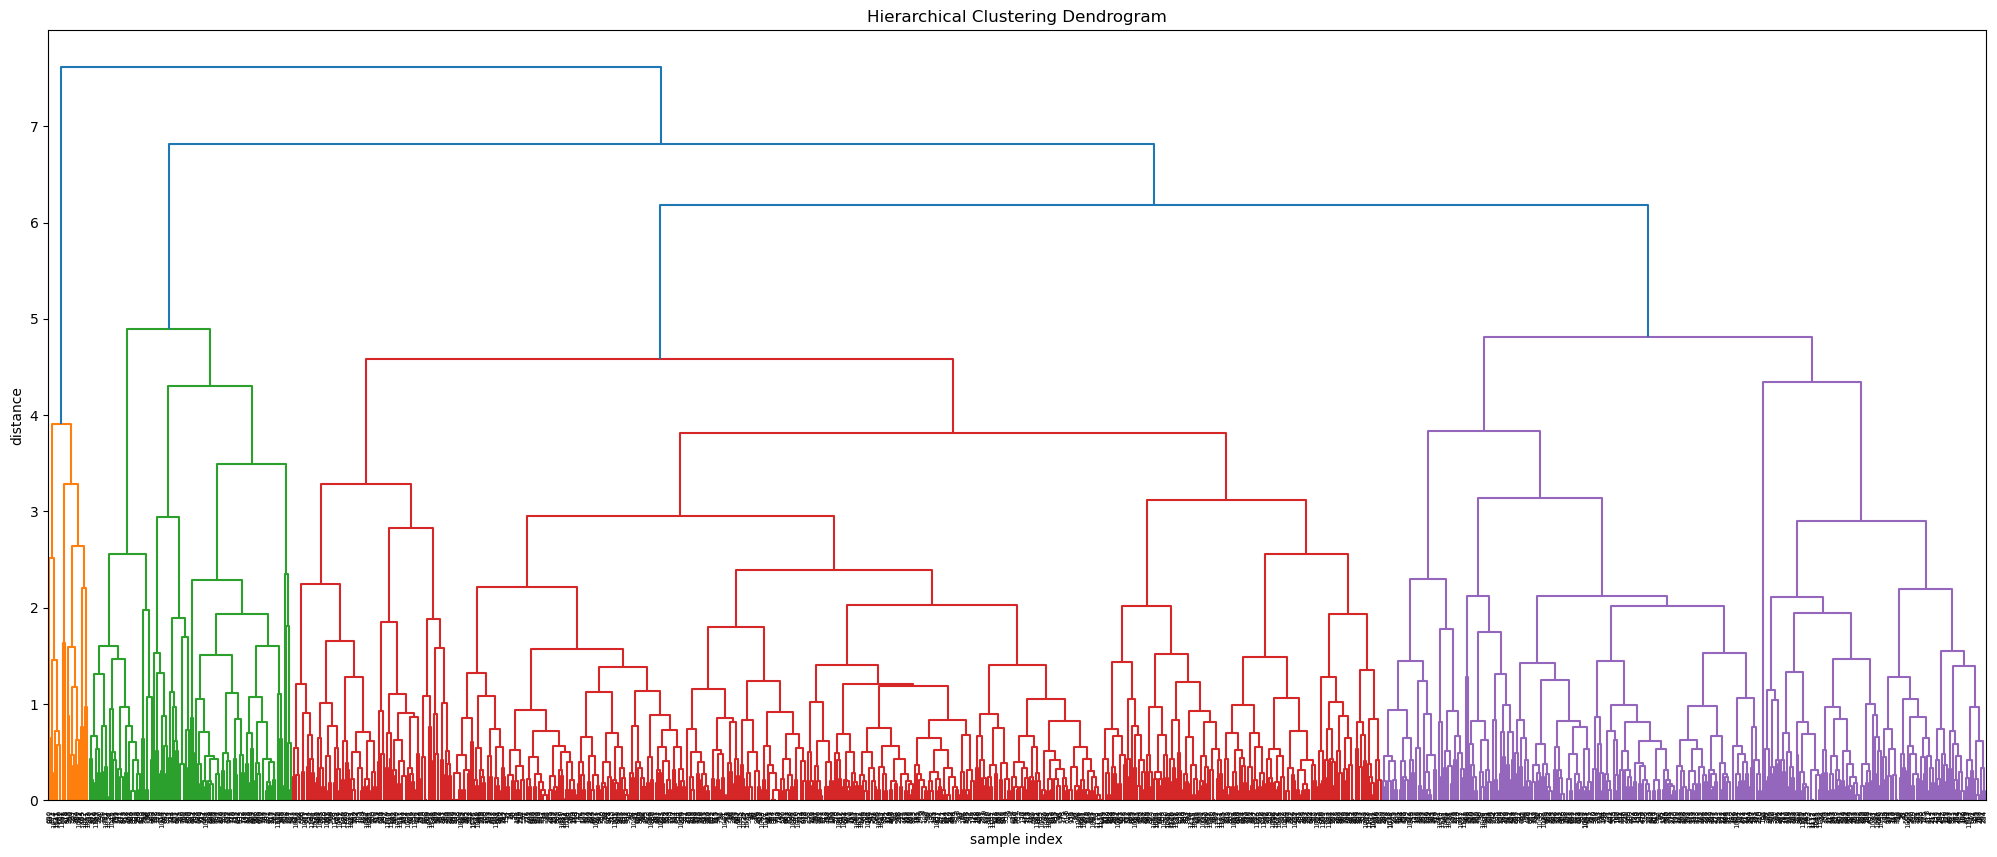

In [101]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
hc_complete = linkage(Xss, "complete")
hc_average = linkage(Xss, "average")
hc_single = linkage(Xss, "single")
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
hc_complete,
#leaf_rotation=45., # rotates the x axis labels
#leaf_font_size=20., # font size for the x axis labels
)
plt.show()

In [102]:
print(cut_tree(hc_complete, n_clusters = 6).T) # Printing transpose just for space

[[0 0 0 ... 0 5 0]]


In [103]:
from sklearn.cluster import AgglomerativeClustering
cha = AgglomerativeClustering(linkage="ward",
n_clusters=6
)
X['cha'] =  cha.fit_predict(X)

C:\Users\-\AppData\Local\Temp\ipykernel_5368\2096068206.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
X['cha'].unique()

array([5, 1, 3, 0, 2, 4], dtype=int64)

# 
- Visualisation 3D des clusters

In [105]:
PLOT = go.Figure()
for i in list(X['cha'].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = X[X['cha']== i]['citric acid'],
                                y =X[X['cha'] == i]['free sulfur dioxide'],
                                z = X[X['cha']== i]['alcohol'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='citric acid: %{x} <br>free sulfur dioxide %{y} <br>alcohol: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'citric acid', titlefont_color = 'black'),
                                yaxis=dict(title = 'free sulfur dioxide', titlefont_color = 'black'),
                                zaxis=dict(title = 'alcohol', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

- Evaluation du modele CHA

In [106]:
metrics.silhouette_score(X, cha.labels_)


0.5513104446894718

- Apres avoir appliqué plusieurs notions de l'apprentissage automatique non supervisé sur des données réelles, nous pouvons sortir par une conclusion, cest que la phase de la mise en echelle est indisponsable avant d'appliquer quelque soit un traitement sur un jeu de données, ainsi que, tantque le nombre des colonnes augmentes , la complexité augmente aussi , c'est ce qu'on apppelle la malédiction des grandes dimension, surtout lors de l'application des algorithmes de clustring, du coup L'PCA est un le meilleurs choix pour s'en sortir de ce genre de problemes. Et finalement, nous pouvons dire aussi que chaque algorithme de segementation ou bien algorithme de classification (si on suit l'ecole americanne), a sa propre facon de traitement ainsi que ses avantages et inconvegnants.    

# 
# 
* Réalisé par :  Mohammed EHIRI